In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

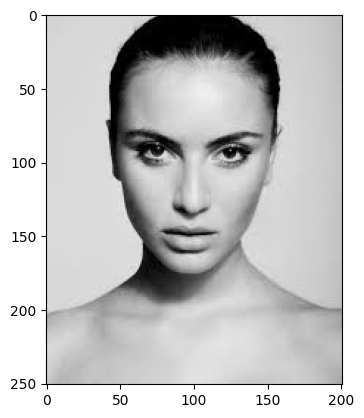

In [20]:
def harris_corner_detector(image, k=0.04, threshold=0.01):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # calculate gradients using Sobel filter
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # calculateproducts of gradients
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Apply a Gaussian filter to the products of gradients
    sigma = 1
    Ixx = cv2.GaussianBlur(Ixx, (5, 5), sigma)
    Iyy = cv2.GaussianBlur(Iyy, (5, 5), sigma)
    Ixy = cv2.GaussianBlur(Ixy, (5, 5), sigma)

    # Compute Harris corner response
    det = (Ixx * Iyy) - (Ixy ** 2)
    trace = Ixx + Iyy
    R = det - k * (trace ** 2)

    # Threshold for corner detection
    # Threshold for an optimal value, it may vary depending on the image
    
    corners = np.zeros_like(R)
    corners[R > threshold * R.max()] = 255
    
    edges = np.zeros_like(R)
    edges [R < -0.01 * R.max()] = 255
    

    return corners, edges

# Read the image
#image = cv2.imread('harris.jpg')
#image = cv2.imread('chess.png')
image = cv2.imread('Face.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [21]:
# Detect corners using Harris Corner Detector
[corners, edges] = harris_corner_detector(image)


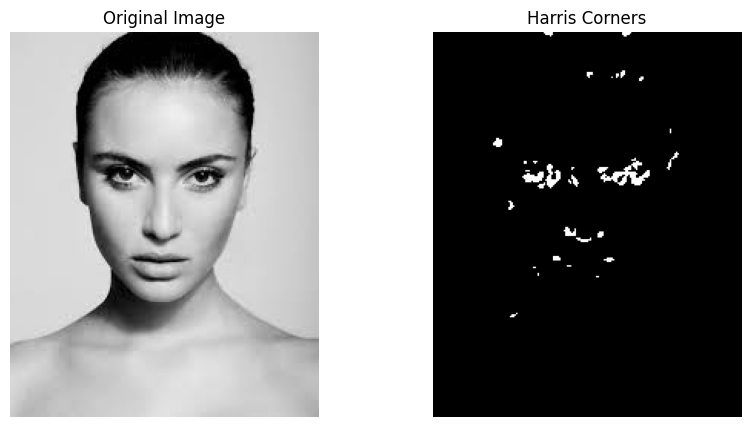

In [22]:
# Display the original image and the detected corners using matplotlib

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(corners, cmap='gray')
plt.title('Harris Corners')
plt.axis('off')

plt.show()

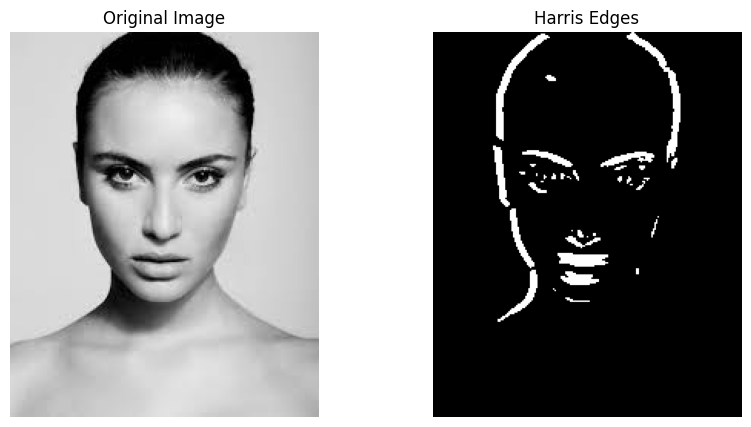

In [23]:
# Display the original image and the detected corners using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Harris Edges')
plt.axis('off')

plt.show()

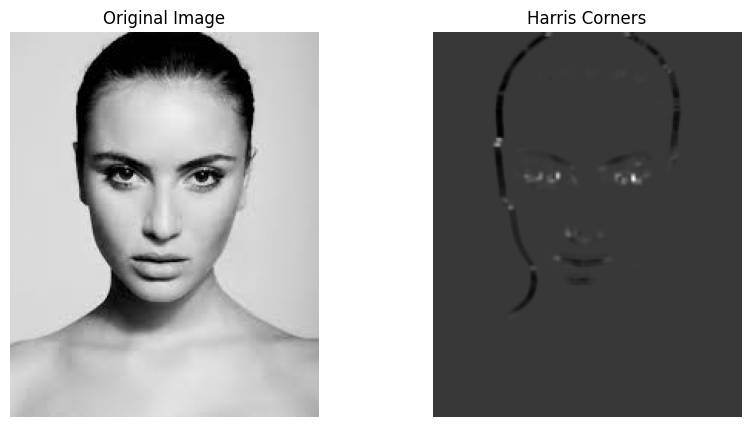

In [24]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,5,5,0.04)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(dst,cmap='gray')
plt.title('Harris Corners')
plt.axis('off')

plt.show()
